# Q1 - Sampling

#Q1.1

#generate random fraction between 0 and 1

float randomFraction = random(0,1)

if randomFraction<(0.2):

    print("Movies")
    
elif randomFraction<(0.2+0.4):

    print("COMP-551")
    
elif randomFraction<(0.2+0.4+0.1):

    print("Playing")
    
else:

    print("Studying")


In [3]:
import random
import matplotlib.pyplot as plt

In [4]:
#Q1.2

def sampling_alg(max_range):
    movies=0
    comp=0
    playing=0
    studying=0
    for i in range(0, max_range):
        randomFraction = random.uniform(0,1)

        if randomFraction<0.2:
                movies+=1
        elif randomFraction<(0.6):
            comp+=1
        elif randomFraction<(0.7):
            playing+=1
        else:
            studying+=1
    
    movies/=max_range
    comp/=max_range
    playing/=max_range
    studying/=max_range

    print("Range:", max_range)

    print('Movies:%d, COMP-551:%.3f, Playing:%.3f, Studying:%.3f \n' % (movies, comp, playing, studying))

In [5]:
sampling_alg(100)
sampling_alg(1000)

Range: 100
Movies:0, COMP-551:0.430, Playing:0.100, Studying:0.320 

Range: 1000
Movies:0, COMP-551:0.419, Playing:0.089, Studying:0.286 



As we go from 100 samples to 1000 samples, the calculated fractions get closer to the given multinomial distribution.

# Q2 - Model Selection 

In [9]:
import pandas as pd
import numpy as np
import math

Training MSE:  6.474879050431621


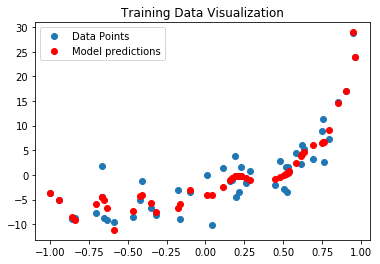

In [166]:
train_data1_in = pd.read_csv('./Assignment1/Datasets/Dataset_1_train.csv', header=None, usecols=[0, 1])
test_data1_in = pd.read_csv('./Assignment1/Datasets/Dataset_1_test.csv', header=None, usecols=[0, 1])
validation_data1_in = pd.read_csv('./Assignment1/Datasets/Dataset_1_valid.csv', header=None, usecols=[0, 1])


def polynomial_fit(x, y, degree, lmb):

    current_degree = 0
    X = np.ones(shape=(len(x), degree + 1))

    for i in reversed(range(degree + 1)):
        X[:, i] = np.array([math.pow(xi, current_degree) for xi in x])
        current_degree += 1

    X = np.matrix(X)
    Y = np.matrix(y)
    Y = np.transpose(Y)
    
    I = np.identity(degree+1)

    W = np.linalg.inv((np.matrix.transpose(X)*X) + lmb*I)*(np.matrix.transpose(X)*Y)

    return W

def predict1(W, x):

    y_pred = 0.0
    for i in range(W.size):
        Wi = W[i, 0]
        xi = math.pow(x, W.size - i - 1)
        y_pred += Wi*xi

    return y_pred

def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()

x = train_data1_in[0]
y = train_data1_in[1]

x_valid = validation_data1_in[0]
y_valid = validation_data1_in[1]

x_test = test_data1_in[0]
y_test = test_data1_in[1]

mse_train = []
mse_valid = []
mse_test = []

y_pred_train = []
y_pred_valid = []
y_pred_test = []

polymodel = polynomial_fit(train_data1_in[0], train_data1_in[1], 20, 0)

for i in range(x.size):
    y_pred_train.append(predict1(polymodel, train_data1_in[0][i]))

for i in range(x_valid.size):
    y_pred_valid.append(predict1(polymodel, validation_data1_in[0][i]))

mse_train = mse(y, y_pred_train)
mse_valid = mse(y_valid, y_pred_valid)

print("Training MSE: ", mse_train)

plt.title("Training Data Visualization")
plt.plot(x, y, 'o',  x, y_pred_train, 'ro')
plt.legend(['Data Points', 'Model predictions'])
plt.show()

Training MSE:  6.474879050431621


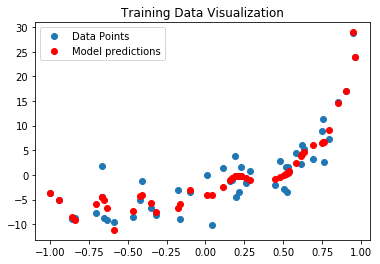

In [170]:

polymodel = polyfit(train_data1_in[0], train_data1_in[1], 20, 0)
y_pred_t = []
y_pred_v = []

for i in range(x.size):
    y_pred_t.append(predict1(polymodel, train_data1_in[0][i]))

for i in range(x_valid.size):
    y_pred_v.append(predict1(polymodel, validation_data1_in[0][i]))

t_mean_square_error = mse(train_data1_in[1], y_pred_train)
v_mean_square_error = mse(validation_data1_in[1], y_pred_valid)

print("Training MSE: ", t_mean_square_error)

plt.title("Training Data Visualization")
plt.plot(x, y, 'o', x, y_pred_train, 'ro')
plt.legend(['Data Points', 'Model predictions'])
plt.show()

# Q3 - Gradient Descent for Regression

In [151]:
#Q3.1(a)

train_data2_in = pd.read_csv('./Assignment1/Datasets/Dataset_2_train.csv', header=None, usecols=[0, 1])
test_data2_in = pd.read_csv('./Assignment1/Datasets/Dataset_2_test.csv', header=None, usecols=[0, 1])
validation_data2_in = pd.read_csv('./Assignment1/Datasets/Dataset_2_valid.csv', header=None, usecols=[0, 1])

# Make a prediction with coefficients
def predict(w0, w1, x):
    y_cap = w0 + w1*x
    return y_cap

def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()
 
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(x, y, l_rate, n_epoch):
    coef = [0.0, 0.0]
    w0 = coef[0]
    w1 = coef[1]
    
    for epoch in range(n_epoch):
        y_pred_train2 = []
        y_pred_valid2 = []
        y_pred_test2 = []

        sum_error = 0
        for i in range(len(x)):
            y_cap = predict(w0, w1, x[i])
            error = y_cap - y[i]
            sum_error += error**2
            w0 -= l_rate * error
            w1 -= l_rate * error * x[i]
                    
        for index, data_point in train_data2_in.iterrows():
            y_pred_train2.append(predict(w0, w1, data_point[0]))
            
        for index, data_point in validation_data2_in.iterrows():
            y_pred_valid2.append(predict(w0, w1, data_point[0]))

        for index, data_point in test_data2_in.iterrows():
            y_pred_test2.append(predict(w0, w1, data_point[0]))
            
        pred_dict[epoch] = y_pred_train2
            
        mse_train.append(mse(y, y_pred_train2))
        mse_valid.append(mse(y_valid, y_pred_valid2))
        mse_test.append(mse(y_valid, y_pred_test2))
        
        coef = [w0, w1]
    
    return coef
 

x = train_data2_in[0]
y = train_data2_in[1]

x_valid = validation_data2_in[0]
y_valid = validation_data2_in[1]

x_test = test_data2_in[0]
y_test = test_data2_in[1]

n_epoch = 1000
step_size = 0.000001

mse_train = []
mse_valid = []
mse_test = []
y_pred_train2 = []
y_pred_valid2 = []
y_pred_test2 = []
pred_dict = {}

coef = coefficients_sgd(x, y, step_size, n_epoch)


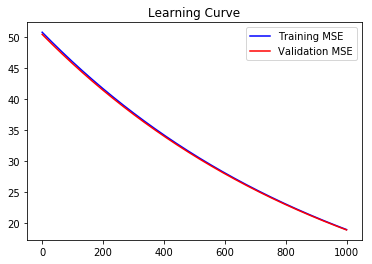

In [84]:
#Q3.1(b)

epochs = [x for x in range(n_epoch)]

plt.title("Learning Curve")
plt.plot(epochs, mse_train, color="blue")
plt.plot(epochs, mse_valid, color="red")
plt.legend(['Training MSE', 'Validation MSE'])
plt.show()

In [90]:
# Q3.2

list_steps = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.0000001]
n_epoch = 1000
mse_valid = []
list_mse = []
thisdict = {}

for step_size in list_steps:
    mse_valid = []
    coef = coefficients_sgd(x, y, step_size, n_epoch)
    curr_mse = np.mean(mse_valid)
    list_mse.append(curr_mse)
    thisdict[step_size] = curr_mse

In [93]:
#(a)

print("Step size    Validation MSE")
thisdict

Step size    Validation MSE


{1e-07: 47.997612490840297,
 1e-05: 5.28507052684001,
 0.0001: 0.63343621093144797,
 0.001: 0.15657090445756247,
 0.01: 0.12440723065037519,
 0.1: 0.15057481157118197,
 1: 0.92291689680302424}

Step size of the chosen model:  0.01
Test MSE of the chosen model:  33.3512266667


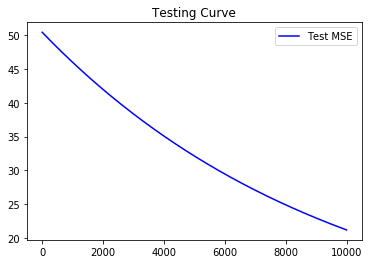

In [94]:
#(b)

curr_step_size = min(thisdict, key=thisdict.get)

n_epoch = 10000
epochs = [x for x in range(n_epoch)]

mse_train = []
mse_valid = []
mse_test = []

coef = coefficients_sgd(x, y, step_size, n_epoch)
curr_mse = np.mean(mse_test)

print("Step size of the chosen model: ", curr_step_size)
print("Test MSE of the chosen model: ", curr_mse)

plt.title("Testing Curve")
plt.plot(epochs, mse_test, '-b')
plt.legend(['Test MSE'])
plt.show()

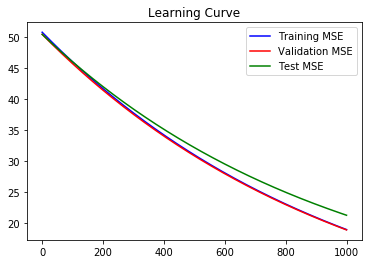

In [89]:
#Q3.3

plt.title("Learning Curve")
plt.plot(epochs, mse_train, color="blue")
plt.plot(epochs, mse_valid, color="red")
plt.plot(epochs, mse_test, color="green")
plt.legend(['Training MSE', 'Validation MSE', 'Test MSE'])
plt.show()


Epoch number:  254


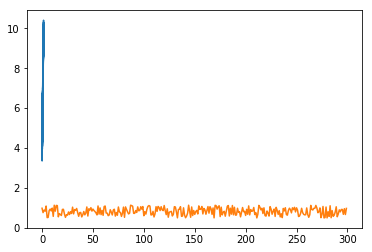

Epoch number:  880


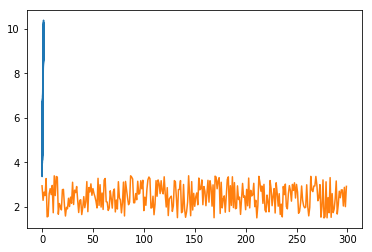

Epoch number:  234


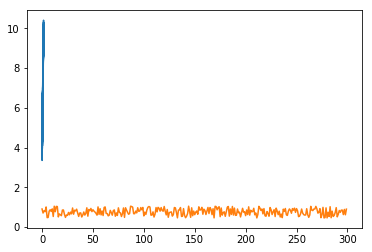

Epoch number:  809


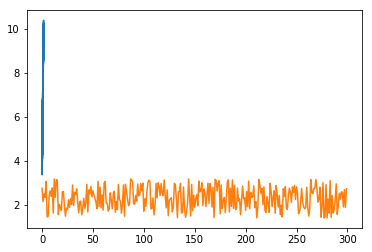

Epoch number:  669


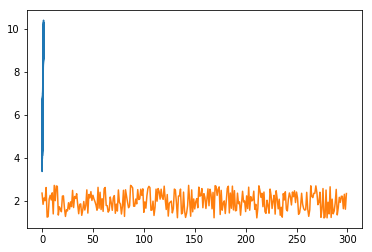

In [196]:
for i in range(5):
    random_epoch = random.randint(0, n_epoch)
    
    print("Epoch number: ", random_epoch)
    #plt.title("Learning Curve")
    plt.plot(train_data2_in[0], train_data2_in[1], pred_dict[random_epoch])
    #plt.plot(train_data2_in[0], train_data2_in[1], 'b')
    #plt.plot(pred_dict[random_epoch], color="red")
    #plt.legend(['Y', 'Predicted Y'])
    plt.show()
    

# Q4 - Real-life Dataset

In [99]:
#just loading the data

crime_data = pd.read_csv('./Assignment1/communities.data', header=None)
crime_data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [126]:
#Q4.1(a)

cleaned_crime_data = pd.read_csv('./Assignment1/communities.data', header=None, sep=',', na_values=['?'])

for col in cleaned_crime_data:
    try :
        m = cleaned_crime_data[col].mean()
        cleaned_crime_data[col].fillna(m, inplace=True)
    except :
        continue
        
with open("./Assignment1/communities.name", 'r') as names_file:
    names_in = names_file.read().splitlines(True)

header = []
for line in names_in:
    if ('@data' in line):
        break
    else:
        if (line.startswith('@attribute')):
            if 'numeric' in line:
                header.append((line.split('@attribute '))[1].split(' numeric')[0])
            else:
                header.append((line.split('@attribute '))[1].split(' string')[0])

cleaned_crime_data.columns= header

# And finally export and display the data
cleaned_crime_data.to_csv('cleaned_communities.data')
cleaned_crime_data.head()


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,58.826829,46188.336597,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,58.826829,46188.336597,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,58.826829,46188.336597,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5.000000,81440.000000,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,95.000000,6096.000000,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


#Q4.1(a)
This is not a good choice because doing this reduces the variations in the data. Even though substituting the empty values with the mean may result in a complete dataset, it reduces the variability and correlation in the data.

#Q4.1(b)
1. Manually find and fill in the data
2. Use the most frequent observation instead of the mean
3. Use another regression model to more accurately predict the missing value
4. Omit the rows with the missing data

#Q4.1(c)
I have 2 better methods - replace with the most frequent obseservation, or build another regression model.
Because of time constraints, I am implementing the first one.

**Description**: Replace missing values with the mode instead of the mean.

My method might provide improvement in performance if the dataset has more discrete values - such as in 'state', or the 'fold'.
My method does better in such cases bacause obviously a state can't be 9 and 3/4. It has to be either 9 or 10. (Similarly for the other such discrete features). Furthermore, if it is unclear that a feature is discrete or not, my method uses a value that is already in the dataset, so the parity between discrete and non-discrete features doesn't affect the values. Whereas, if we replace the values with the mean, it may result in a scenario where your state is 2.5 rather than 2 or 3.

Furthermore, taking the median also raises an issue similar to that of mean.


In [121]:
for col in cleaned_crime_data:
    try :
        m = cleaned_crime_data[col].mode()
        cleaned_crime_data[col].fillna(m, inplace=True)
    except :
        continue
        
print("Completed Dataset using mode:")
cleaned_crime_data.head()

Completed Dataset using mode:


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,58.826829,46188.336597,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,58.826829,46188.336597,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,58.826829,46188.336597,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5.000000,81440.000000,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,95.000000,6096.000000,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


Shuffle the dataset randomly.
Split the dataset into k groups
For each unique group: 
Take the group as a hold out or test data set
Take the remaining groups as a training data set
Fit a model on the training set and evaluate it on the test set
Retain the evaluation score and discard the model
Summarize the skill of the model using the sample of model evaluation scores

In [177]:
#Q4.2

k = 5
num_groups = cleaned_crime_data.size/k

cleaned_crime_data = cleaned_crime_data.sample(frac=1).reset_index(drop=True)

try:
    cleaned_crime_data.drop(['state', 'county', 'community', 'communityname', 'fold'], axis=1, inplace=True)
except:
    pass
    
i = 1
CandC_train1 = pd.DataFrame()
CandC_train2 = pd.DataFrame()
CandC_train3 = pd.DataFrame()
CandC_train4 = pd.DataFrame()
CandC_train5 = pd.DataFrame()
CandC_test1 = pd.DataFrame()
CandC_test2 = pd.DataFrame()
CandC_test3 = pd.DataFrame()
CandC_test4 = pd.DataFrame()
CandC_test5 = pd.DataFrame()

for subset in np.array_split(cleaned_crime_data, 5):
    foo = "CandC_train" + str(i)
    foo2 = "CandC_test" + str(i)
    
    exec(foo + " = subset.sample(frac=0.8, random_state=87)")
    exec(foo2 + " = subset.drop(" + foo + ".index)")
    
    exec(foo + ".reset_index(drop = True, inplace=True)")
    exec(foo2 + ".reset_index(drop = True, inplace=True)")
    
    # Export the csvs
    exec(foo + ".to_csv('" + foo +".csv', index=False)")
    exec(foo2 + ".to_csv('" + foo2 +".csv', index=False)")
    i+=1
    
CandC_test1.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.04,0.29,0.64,0.47,0.08,0.02,0.33,0.50,0.32,0.39,...,0.02,0.44,0.28,0.163103,0.076708,0.698589,0.440439,0.0,0.195078,0.59
1,0.02,0.37,0.02,0.96,0.06,0.02,0.37,0.39,0.24,0.58,...,0.04,0.14,0.03,0.163103,0.076708,0.698589,0.440439,0.0,0.195078,0.16
2,0.00,0.33,0.16,0.87,0.02,0.01,0.15,0.28,0.12,0.88,...,0.01,0.21,0.08,0.163103,0.076708,0.698589,0.440439,0.0,0.195078,0.14
3,0.04,0.56,0.03,0.89,0.31,0.04,0.34,0.42,0.27,0.31,...,0.09,0.08,0.12,0.163103,0.076708,0.698589,0.440439,0.0,0.195078,0.04
4,0.09,0.28,0.11,0.61,0.85,0.28,0.24,0.37,0.22,0.66,...,0.04,0.43,0.52,0.163103,0.076708,0.698589,0.440439,0.0,0.195078,0.37


In [178]:
def multivariate_lin_fit(data, lmb):

    ones = np.ones(data.shape[0])
    
    try:
        data.insert(loc=0, column='ones', value=ones)
    except: 
        pass
    
    y = data[data.columns[-1]]
    x = data.drop(data.columns[len(data.columns)-1], axis=1)

    X = np.matrix(x)

    Y = np.matrix(y)
    Y = np.transpose(Y)

    I = np.identity(X.shape[1])

    W = np.linalg.inv((np.matrix.transpose(X) * X) + lmb * I) * (np.matrix.transpose(X) * Y)

    return W

def multivariate_predict(W, x):
    y_pred = 0.0
    for i in range(W.size):
        Wi = W[i, 0]
        if i == 0:
            xi = 1
        else:
            xi = x[i-1]

        y_pred += Wi*xi

    return y_pred

def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()

mse_list = []
Ws = []

for k in range(1,6):

    W = None
    x_test = None
    y_test = None
    y_pred = []

    foo = "CandC_train" + str(k)
    foo2 = "CandC_test" + str(k)

    exec("W = (multivariate_lin_fit(" + foo +", 0))")
    Ws.append(W)
    exec("y_test = " + foo2 + "[" + foo2 + ".columns[-1]]")
    exec("x_test = "+ foo2 +".drop(" + foo2 +".columns[len(" + foo2 + ".columns) - 1], axis=1)")

    for j in range(x_test.shape[0]):
        y = multivariate_predict(W, x_test.iloc[j])
        y_pred.append(y)

    mse_list.append(mse(y_test, y_pred))

avg_mse = 0
for mse in mse_list:
    avg_mse += mse
avg_mse = avg_mse/len(mse_list)

print("Average MSE: ", avg_mse)

Average MSE:  0.03307557316517943


In [184]:
lambda_vals = np.linspace(0, 1, 101)
lambda_mses = []
W_min_indices = []

for lam in lambda_vals:
    
    def mse(y, y_pred):
        return ((y - y_pred) ** 2).mean()

    mses = []
    Ws = []

    for k in range(1,6):

        W = None
        x_test = None
        y_test = None
        y_pred = []

        foo = "CandC_train" + str(k)
        foo2 = "CandC_test" + str(k)

        exec("W = (multivariate_lin_fit(" + foo +", lam))")
        Ws.append(W)
        
        min_index = np.argmin(W, axis=0)
        if min_index not in W_min_indices: W_min_indices.append(min_index)
        
        exec("y_test = " + foo2 + "[" + foo2 + ".columns[-1]]")
        exec("x_test = "+ foo2 +".drop(" + foo2 +".columns[len(" + foo2 + ".columns) - 1], axis=1)")

        for j in range(x_test.shape[0]):
            y = multivariate_predict(W, x_test.iloc[j])
            y_pred.append(y)

        mses.append(mse(y_test, y_pred))

    avg_mse = 0
    for mse in mses:
        avg_mse += mse
    avg_mse = avg_mse/len(mses)
    lambda_mses.append(avg_mse)
    
    print("Lambda =", lam)
    print("Average MSE: ", avg_mse)

Lambda = 0.0
Average MSE:  0.03307557316517943
Lambda = 0.01
Average MSE:  0.02795548238895899
Lambda = 0.02
Average MSE:  0.02617538405246429
Lambda = 0.03
Average MSE:  0.025144894780323102
Lambda = 0.04
Average MSE:  0.024466598349843872
Lambda = 0.05
Average MSE:  0.023982066803140814
Lambda = 0.06
Average MSE:  0.023615719370664295
Lambda = 0.07
Average MSE:  0.02332687373853065
Lambda = 0.08
Average MSE:  0.02309167385703606
Lambda = 0.09
Average MSE:  0.022895203647516793
Lambda = 0.1
Average MSE:  0.022727657922673734
Lambda = 0.11
Average MSE:  0.022582325974438662
Lambda = 0.12
Average MSE:  0.02245445955924326
Lambda = 0.13
Average MSE:  0.022340603568334054
Lambda = 0.14
Average MSE:  0.02223818290361978
Lambda = 0.15
Average MSE:  0.022145238081014162
Lambda = 0.16
Average MSE:  0.02206025068652578
Lambda = 0.17
Average MSE:  0.021982025007543933
Lambda = 0.18
Average MSE:  0.02190960584434464
Lambda = 0.19
Average MSE:  0.021842220240154107
Lambda = 0.2
Average MSE:  0.02

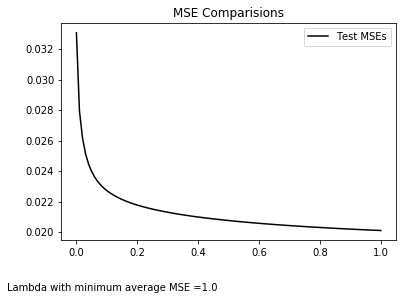

In [180]:
s = "Lambda with minimum average MSE =" + str(lambda_vals[lambda_mses.index(min(lambda_mses))])
plt.title("MSE Comparisions")
plt.plot(lambda_vals, lambda_mses, '-', color='black')
plt.legend(['Test MSEs'])
plt.figtext( 0, -0.05, s)
plt.show()

In [182]:
def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()

mses = []
Ws = []

for k in range(1,6):

    W = None
    x_test = None
    x_train = None
    y_test = None
    y_pred = []

    foo = "CandC_train" + str(k)
    foo2 = "CandC_test" + str(k)
    
    for indx in W_min_indices:
        s = str(indx)[2:-2]
        exec("x_train = "+ foo +".drop(" + foo +".columns[" + s + "], axis=1)")
        exec("x_test = "+ foo2 +".drop(" + foo2 +".columns[" + s + "], axis=1)")
    
    W = (multivariate_lin_fit(x_train, 1.0))
    Ws.append(W)
    exec("y_test = " + foo2 + "[" + foo2 + ".columns[-1]]")
    exec("x_test = "+ foo2 +".drop(" + foo2 +".columns[len(" + foo2 + ".columns) - 1], axis=1)")

    for j in range(x_test.shape[0]):
        y = multivariate_predict(W, x_test.iloc[j])
        y_pred.append(y)

    mses.append(mse(y_test, y_pred))

avg_mse = 0
for mse in mses:
    avg_mse += mse
avg_mse = avg_mse/len(mses)

print("Average MSE with reduced set of features: ", avg_mse)

Average MSE with reduced set of features:  0.03240343994377133
